In [1]:
N = (12 + 4) % 5 + 1
print("Варіант індивідуального завдання " + str(N))

Варіант індивідуального завдання 2


**Номери вправ для варіанту 2: 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27**

In [2]:
import pandas as pd

df = pd.read_csv("NationalNames.csv")

In [3]:
# 3. Отримайте імена стовпців набору даних

print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [4]:
# 4. Отримайте загальну інформацію про дані у наборі даних.

df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [5]:
# 5. Знайдіть кількість унікальних імен у наборі даних

df['Name'].nunique()

93889

In [6]:
# 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

max_count_row = df.loc[df['Count'].idxmax()]
most_popular_name = max_count_row['Name']
year_of_max_count = max_count_row['Year']
print(f"The name is '{most_popular_name}' in {year_of_max_count}")

The name is 'Linda' in 1947


In [7]:
# 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print(min_count_records)

254615


In [8]:
# 11. Знайдіть рік із найбільшою кількістю унікальних імен.

unique_names_per_year = df.groupby('Year')['Name'].nunique()

year_max_names = unique_names_per_year.idxmax()
max_names = unique_names_per_year.max()

result_df = pd.DataFrame({'Year': [year_max_names], 'Name': [max_names]})

result_df.set_index('Year')

,Name
Year,
2008,32488


In [9]:
# 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

year_max_names = df.groupby('Year')['Name'].nunique().idxmax()

df_2008 = df[df['Year'] == year_max_names]

most_popular_name = df_2008.groupby('Name')['Count'].sum().idxmax()

most_popular_name

'Jacob'

In [10]:
# 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

jacob_female_name = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

most_popular_year = jacob_female_name.loc[jacob_female_name['Count'].idxmax()]

most_popular_year.to_frame().T

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [11]:
# 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

gender_neutral = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
gender_neutral = gender_neutral[gender_neutral['Gender'] == 2]
yearly_neutral_counts = gender_neutral.groupby('Year').size().reset_index(name='Gender_neutral_names')

most_neutral_year = yearly_neutral_counts.loc[yearly_neutral_counts['Gender_neutral_names'].idxmax()]
most_neutral_year.to_frame().T.set_index('Year')

,Gender_neutral_names
Year,
2008,2557


In [12]:
# 16. Знайдіть рік, коли народилося найбільше дітей

total_births_by_year = df.pivot_table(values='Count', index='Year', aggfunc='sum')
max_birth_year = total_births_by_year['Count'].idxmax()

max_birth_year

np.int64(1957)

In [13]:
# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

births_per_year_gender = df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')

births_per_year_gender.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [14]:
# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

births_per_year_gender = df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')
years_more_girls = (births_per_year_gender['F'] > births_per_year_gender['M']).sum()

years_more_girls

np.int64(54)

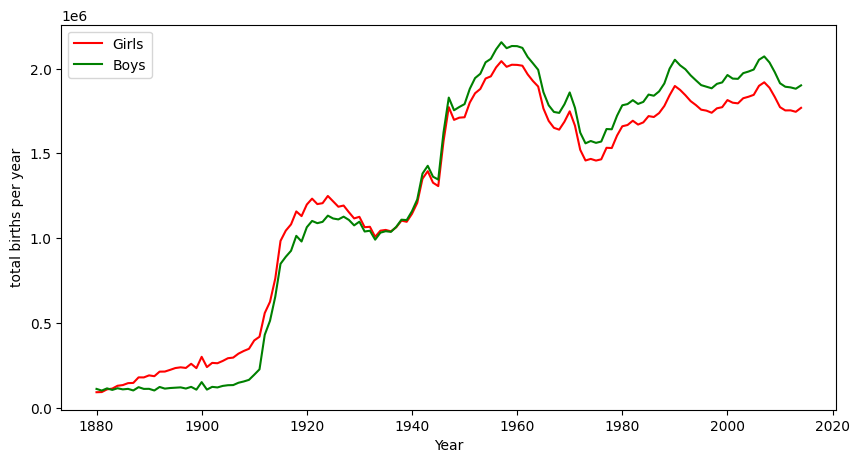

In [15]:
# 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

import matplotlib.pyplot as plt

births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

plt.figure(figsize=(10, 5))
plt.plot(births_per_year_gender.index, births_per_year_gender['F'], label='Girls', color='red')
plt.plot(births_per_year_gender.index, births_per_year_gender['M'], label='Boys', color='green')

plt.xlabel('Year')
plt.ylabel('total births per year')

plt.legend()
plt.show()

In [16]:
# 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

female_names = df[df['Gender'] == 'F']['Name'].unique()
male_names = df[df['Gender'] == 'M']['Name'].unique()

neutral_names = set(female_names) & set(male_names)
neutral_names_count = len(neutral_names)

neutral_names_count

10221

In [17]:
# 22. Підрахуйте скільки років проводилось спостереження

observation_years = df['Year'].nunique()

observation_years

135

In [18]:
# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

name_counts = df.groupby(['Name', 'Year', 'Gender'])['Count'].sum().unstack(fill_value = 0)
gender_neutral_names = name_counts[name_counts['M'] == name_counts['F']]

neutral_names_present_in_every_year = gender_neutral_names.groupby('Name').size()

most_popular_neutral_names = neutral_names_present_in_every_year.sort_values(ascending = False)

print(most_popular_neutral_names)

Name
Toy       9
Delane    9
Arie      8
Ermal     7
Amory     7
         ..
Zia       1
Zenith    1
Zell      1
Zaylyn    1
Zayde     1
Length: 1956, dtype: int64


In [19]:
# 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

total_name_counts = df.groupby('Name')['Count'].sum()

unpopular_names = total_name_counts[total_name_counts < 100]

most_popular_unpopular_name = unpopular_names.idxmax()
most_popular_unpopular_count = unpopular_names[most_popular_unpopular_name]

print(f"Найбільш популярне серед непопулярних імен - {most_popular_unpopular_name}, кількість разів: {most_popular_unpopular_count}.")

Найбільш популярне серед непопулярних імен - Aayana, кількість разів: 99.


In [20]:
# 27. Знайти найпопулярніші імена в кожному році.

most_popular_names = df.loc[df.groupby(['Year', 'Gender'])['Count'].idxmax()]
most_popular_names = most_popular_names[['Year', 'Gender', 'Name', 'Count']].reset_index(drop=True)

most_popular_names

,Year,Gender,Name,Count
0,1880,F,Mary,7065
1,1880,M,John,9655
2,1881,F,Mary,6919
3,1881,M,John,8769
4,1882,F,Mary,8148
...,...,...,...,...
265,2012,M,Jacob,19030
266,2013,F,Sophia,21147
267,2013,M,Noah,18179
268,2014,F,Emma,20799
